<a href="https://colab.research.google.com/github/HARSHIT097/Learnings/blob/main/cASE_Study_Lead_conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study Lead Conversion - Logistic Regression 



## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.

When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.

If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:image.jpg

Lead Conversion Process 
 Demonstrated as a funnel As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom.

In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.
The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

Another thing that you also need to check out for are the levels present in the categorical variables.

Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

## Goal

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. 

A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

# New Section

In [120]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [212]:
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [213]:
#https://raw.githubusercontent.com/HARSHIT097/Learnings/main/Datasets/Datasets/Leads.csv

data = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/HARSHIT097/Learnings/main/Datasets/Datasets/Leads.csv'))
data.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [214]:
#checking duplicates
sum(data.duplicated(subset = 'Prospect ID')) == 0
# No duplicate values

True

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [216]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# alt-exp Random

In [217]:
#missing values
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [218]:
# we will drop the columns having more than 70% NA values.
data = data.drop(data.loc[:,list(round(100*(data.isnull().sum()/len(data.index)), 2)>70)].columns, 1)

In [219]:
data['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

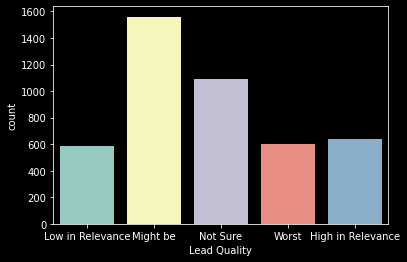

In [220]:
sns.countplot(data['Lead Quality'])

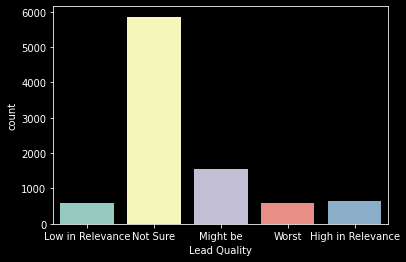

In [221]:
# As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.
data['Lead Quality'] = data['Lead Quality'].replace(np.nan, 'Not Sure')
sns.countplot(data['Lead Quality'])

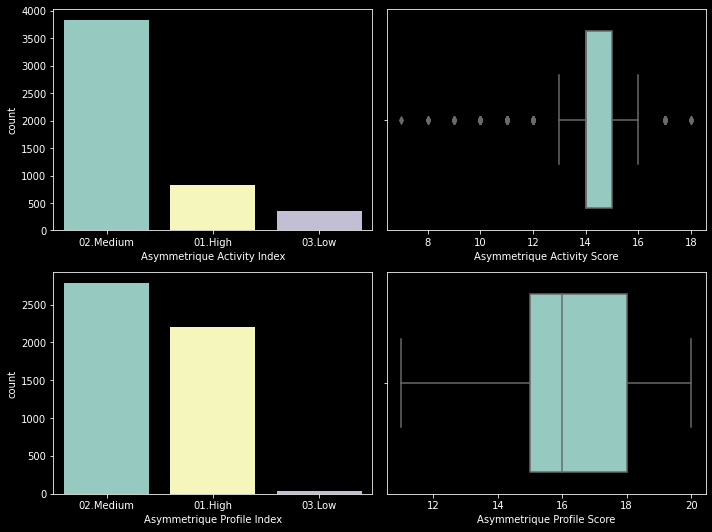

In [222]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(data['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(data['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(data['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(data['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

In [223]:
data.City.describe()

count       7820
unique         7
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

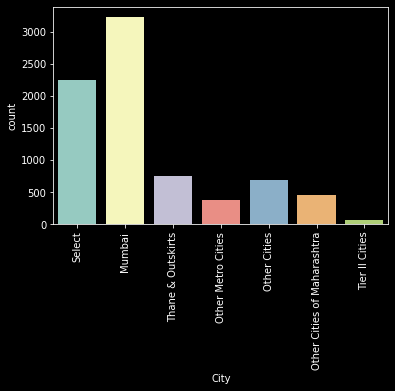

In [224]:
sns.countplot(data.City)
xticks(rotation = 90)

In [225]:
# Around 60% of the data is Mumbai so we can impute Mumbai in the missing values.

data['City'] = data['City'].replace(np.nan, 'Mumbai')

In [226]:
data.Specialization.describe()


count       7802
unique        19
top       Select
freq        1942
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

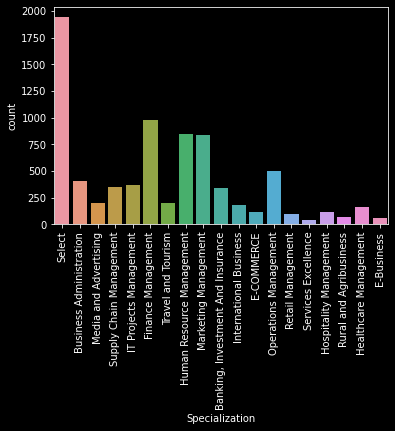

In [227]:
sns.countplot(data.Specialization)
xticks(rotation = 90)

In [228]:
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')

In [229]:
data.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

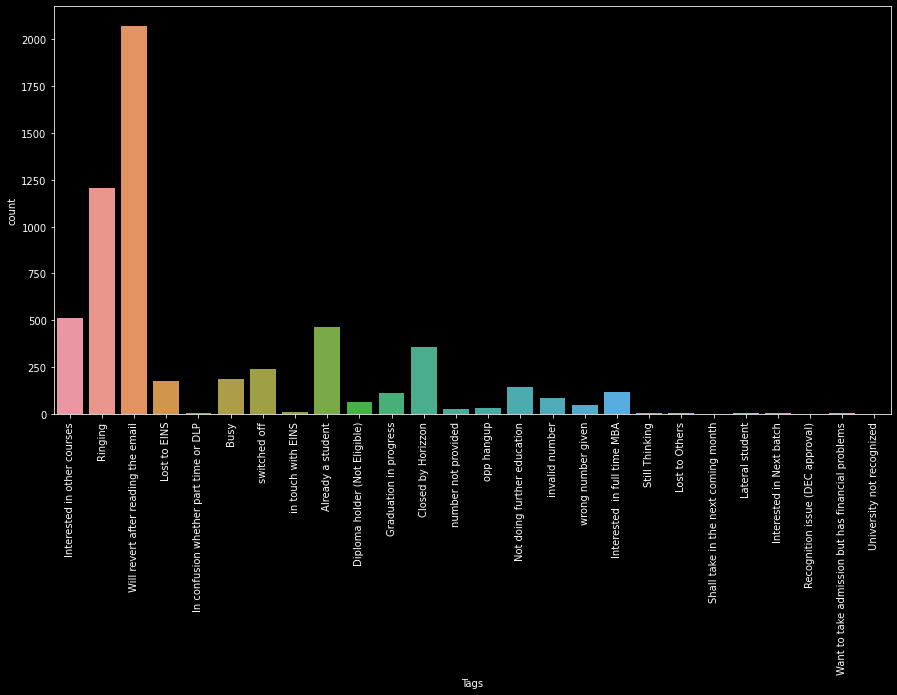

In [230]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(data.Tags)
xticks(rotation = 90)

In [231]:
# Blanks in the tag column may be imputed by 'Will revert after reading the email'.

data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')

In [232]:
data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [233]:
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [234]:
data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [235]:
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [236]:
# Country is India for most values so let's impute the same in missing values.
data['Country'] = data['Country'].replace(np.nan, 'India')

In [237]:
round(100*(data.isnull().sum()/len(data.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [238]:
# Rest missing values are under 2% so we can drop these rows.
data.dropna(inplace = True)

In [240]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

In [241]:
data.to_csv('Leads_cleaned')

In [243]:
data = data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [244]:
data.shape

(3484, 22)

In [ ]:
#https://www.kaggle.com/ashydv/lead-scoring-logistic-regression

# New Section

In [126]:
varlists = np.array(data.columns)
varlists

array(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype=object)

In [127]:
for varlist in varlists:
  print(varlist)
  #print(data[varlist].value_counts())

Prospect ID
Lead Number
Lead Origin
Lead Source
Do Not Email
Do Not Call
Converted
TotalVisits
Total Time Spent on Website
Page Views Per Visit
Last Activity
Country
Specialization
How did you hear about X Education
What is your current occupation
What matters most to you in choosing a course
Search
Magazine
Newspaper Article
X Education Forums
Newspaper
Digital Advertisement
Through Recommendations
Receive More Updates About Our Courses
Tags
Lead Quality
Update me on Supply Chain Content
Get updates on DM Content
Lead Profile
City
Asymmetrique Activity Index
Asymmetrique Profile Index
Asymmetrique Activity Score
Asymmetrique Profile Score
I agree to pay the amount through cheque
A free copy of Mastering The Interview
Last Notable Activity


In [128]:
y_n_vars = ["Do Not Email","Do Not Call","Search","Magazine","Newspaper Article","X Education Forums",
           "Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses",
           "Update me on Supply Chain Content","Get updates on DM Content","A free copy of Mastering The Interview"]

for y_n_var in y_n_vars:
  print(y_n_var)
  print(data[y_n_var].value_counts())

Do Not Email
No     8506
Yes     734
Name: Do Not Email, dtype: int64
Do Not Call
No     9238
Yes       2
Name: Do Not Call, dtype: int64
Search
No     9226
Yes      14
Name: Search, dtype: int64
Magazine
No    9240
Name: Magazine, dtype: int64
Newspaper Article
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
X Education Forums
No     9239
Yes       1
Name: X Education Forums, dtype: int64
Newspaper
No     9239
Yes       1
Name: Newspaper, dtype: int64
Digital Advertisement
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
Through Recommendations
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
Receive More Updates About Our Courses
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
Update me on Supply Chain Content
No    9240
Name: Update me on Supply Chain Content, dtype: int64
Get updates on DM Content
No    9240
Name: Get updates on DM Content, dtype: int64
A free copy of Mastering The Interview
No     6352
Yes    

In [129]:
#creating a map function for yes no values
def binary_map(x):
  return x.map({"Yes":1, "No":0})

data[y_n_vars] = data[y_n_vars].apply(binary_map)
data.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,No,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,No,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,0,Modified


In [130]:
#inspecting Null values
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [131]:
#missing values
round(100*(data.isnull().sum())/len(data), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

columns = []
data = data.drop(columns)

In [132]:
col = ["Country","Specialization","How did you hear about X Education","What is your current occupation",
           "What matters most to you in choosing a course","Tags","Lead Quality","Lead Profile","City","Asymmetrique Activity Index",
           "Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"]
data = data.drop(col, axis=1)

In [133]:
#missing values
round(100*(data.isnull().sum())/len(data), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   int64  
 5   Do Not Call                               9240 non-null   int64  
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

##univariate analysis

plt.style.use("dark_background")

plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.histplot(data["Lead Number"], stat="frequency", color="yellow")
plt.show()

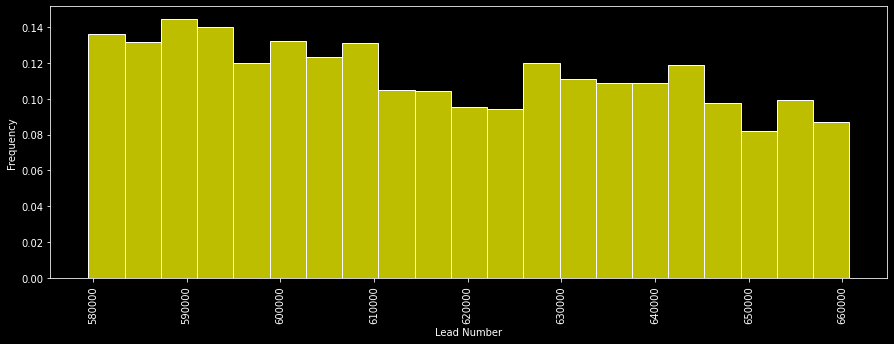

In [135]:
plt.style.use("dark_background")

#Lead Number analysis per country
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.histplot(data["Lead Number"], stat="frequency", color="yellow")
plt.show()

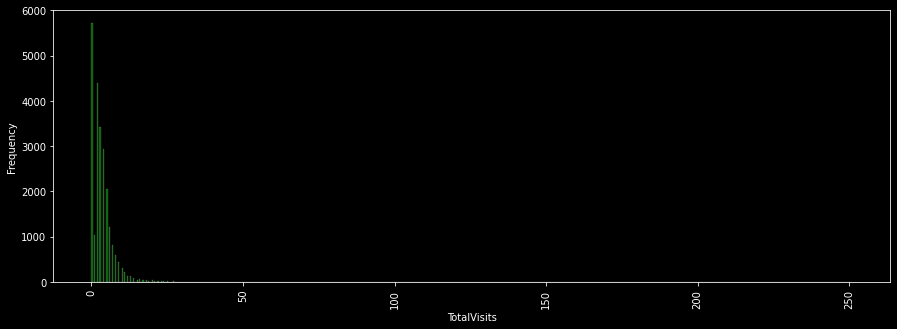

In [136]:
#Lead Number analysis per country
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.histplot(data["TotalVisits"], stat="frequency", color="green")
plt.show()

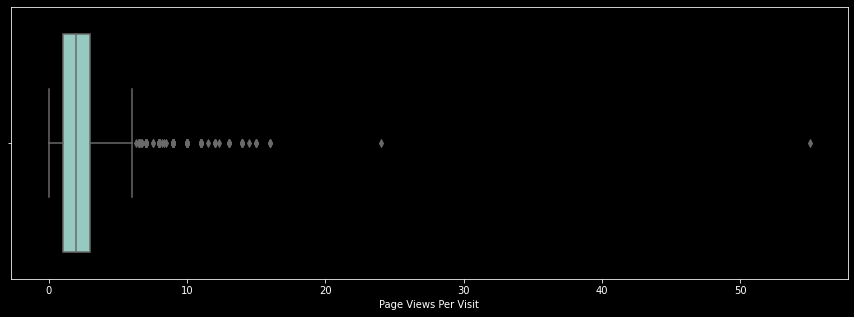

In [137]:
#page views per visit
plt.figure(figsize=[15,5])
sns.boxplot(data["Page Views Per Visit"])

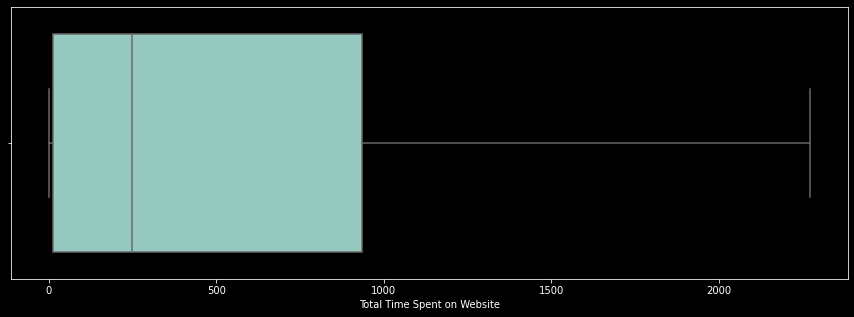

In [138]:
#Total Time Spent on Website
plt.figure(figsize=[15,5])
sns.boxplot(data["Total Time Spent on Website"])

In [139]:
data2 = data.describe(percentiles=[.25,.5,.75,.90,.95,.99])
data2

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,9240.000000,9240.0,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.0,9240.0,9240.0,9240.000000
mean,617188.435606,0.079437,0.000216,0.385390,3.445238,487.698268,2.362820,0.001515,0.0,0.000216,0.000108,0.000108,0.000433,0.000758,0.0,0.0,0.0,0.312554
std,23405.995698,0.270435,0.014711,0.486714,4.854853,548.021466,2.161418,0.038898,0.0,0.014711,0.010403,0.010403,0.020803,0.027515,0.0,0.0,0.0,0.463559
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,596484.500000,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,615479.000000,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,637387.250000,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
90%,650506.100000,0.000000,0.000000,1.000000,7.000000,1380.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
95%,655404.050000,1.000000,0.000000,1.000000,10.000000,1562.000000,6.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
99%,659592.980000,1.000000,0.000000,1.000000,17.000000,1840.610000,9.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000


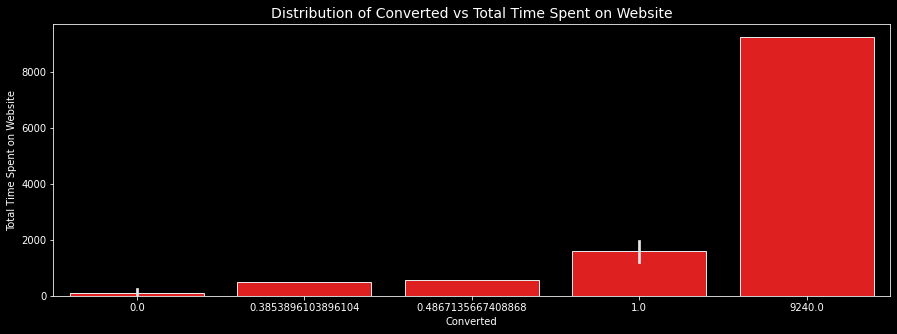

In [140]:
plt.figure(figsize=[15,5])
sns.barplot(data2["Converted"], data2["Total Time Spent on Website"], color="red", errcolor="0.9", edgecolor="0.9")
plt.title("Distribution of Converted vs Total Time Spent on Website", fontsize=14, fontweight=8, verticalalignment="baseline")
plt.show()

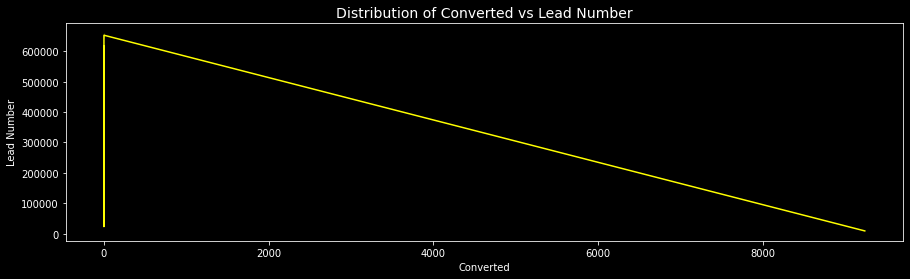

In [141]:
plt.figure(figsize=[15,4])
sns.lineplot(data2["Converted"], data2["Lead Number"], color="yellow")
plt.title("Distribution of Converted vs Lead Number", fontsize=14, fontweight=8, verticalalignment="baseline")
plt.show()

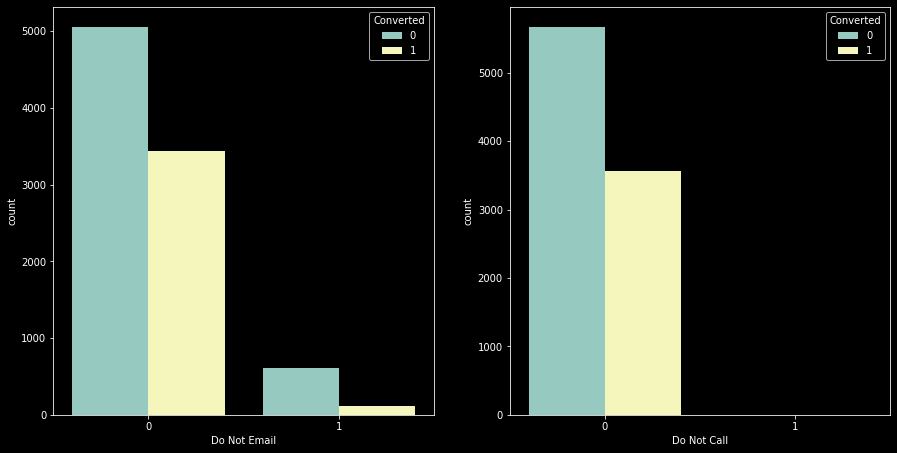

In [142]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = data, ax = axs[1])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

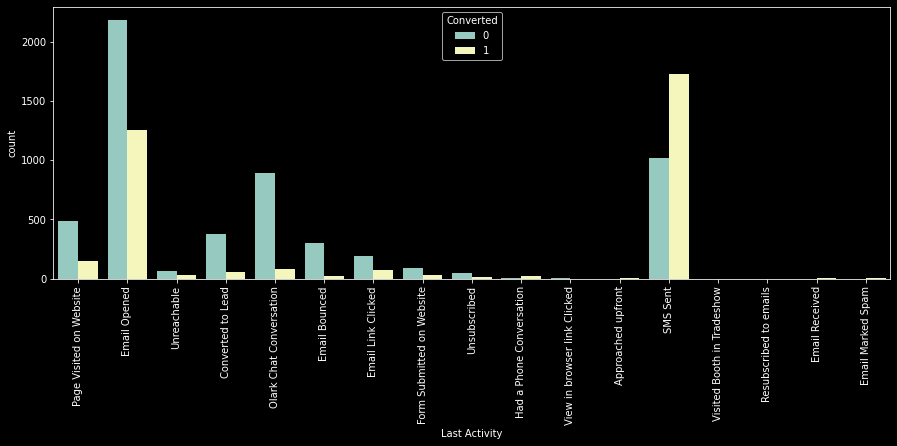

In [143]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

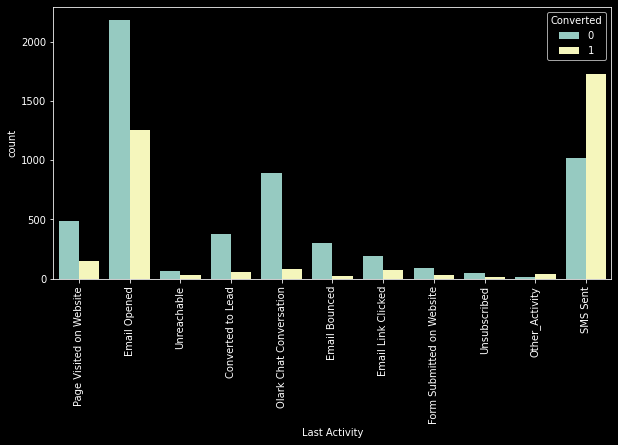

In [144]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

## be Careful!!!
 as Ml algo will accept only numerical value so checking the dtype of all 
 columns and handle it using

--- Label Encoding

or,

--- One- Hot Encoding/Dummy Variables



In [145]:
data2.head(5)

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,9240.000000,9240.0,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.0,9240.0,9240.0,9240.000000
mean,617188.435606,0.079437,0.000216,0.385390,3.445238,487.698268,2.362820,0.001515,0.0,0.000216,0.000108,0.000108,0.000433,0.000758,0.0,0.0,0.0,0.312554
std,23405.995698,0.270435,0.014711,0.486714,4.854853,548.021466,2.161418,0.038898,0.0,0.014711,0.010403,0.010403,0.020803,0.027515,0.0,0.0,0.0,0.463559
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,596484.500000,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   int64  
 5   Do Not Call                               9240 non-null   int64  
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

In [147]:
data.shape

(9240, 24)

In [148]:
le = preprocessing.LabelEncoder()

In [149]:
#lets Start with label Encoding
from sklearn import preprocessing

cat_features=[x for x in data.columns if data[x].dtype=="object"]
cat_features
for col in cat_features:
    if col in data.columns:
        i = data.columns.get_loc(col)
        data.iloc[:,i] = data.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

data.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,4427,660737,0,6,0,0,0,0.0,0,0.0,7,0,0,0,0,0,0,0,0,0,0,0,0,8
1,1554,660728,0,7,0,0,0,5.0,674,2.5,3,0,0,0,0,0,0,0,0,0,0,0,0,4


In [150]:
le = preprocessing.LabelEncoder()
data2 = data.apply(le.fit_transform)
data2.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,4427,9239,0,6,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,8
1,1554,9238,0,7,0,0,0,5,644,47,3,0,0,0,0,0,0,0,0,0,0,0,0,4
2,5140,9237,1,1,0,0,1,2,1435,33,3,0,0,0,0,0,0,0,0,0,0,0,1,4
3,467,9236,1,1,0,0,0,1,305,1,9,0,0,0,0,0,0,0,0,0,0,0,0,8
4,1874,9235,1,3,0,0,1,2,1340,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [151]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Prospect ID                               9240 non-null   int64
 1   Lead Number                               9240 non-null   int64
 2   Lead Origin                               9240 non-null   int64
 3   Lead Source                               9240 non-null   int64
 4   Do Not Email                              9240 non-null   int64
 5   Do Not Call                               9240 non-null   int64
 6   Converted                                 9240 non-null   int64
 7   TotalVisits                               9240 non-null   int64
 8   Total Time Spent on Website               9240 non-null   int64
 9   Page Views Per Visit                      9240 non-null   int64
 10  Last Activity                             9240 non-null   in

In [152]:
data2.shape

(9240, 24)

out-lier Treatment

In [153]:
data3= data2.groupby(by="Converted").sum()

In [154]:
data3.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,2.000000e+00,2.000000e+00,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000e+00,2.000000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.00000,2.0,2.0,2.0,2.0,2.000000,2.000000
mean,2.134209e+07,2.134209e+07,3245.500000,19771.500000,367.000000,1.000000,22901.000000,2.127293e+06,187249.500000,22913.000000,7.000000,0.0,1.0,0.500000,0.500000,2.000000,3.50000,0.0,0.0,0.0,0.0,1444.000000,35538.000000
std,7.129097e+06,6.452318e+06,150.613744,2786.707825,352.139177,1.414214,42.426407,4.659622e+05,49406.257908,2863.782464,2.828427,0.0,0.0,0.707107,0.707107,1.414214,2.12132,0.0,0.0,0.0,0.0,585.484415,7287.442487
min,1.630106e+07,1.677961e+07,3139.000000,17801.000000,118.000000,0.000000,22871.000000,1.797808e+06,152314.000000,20888.000000,5.000000,0.0,1.0,0.000000,0.000000,1.000000,2.00000,0.0,0.0,0.0,0.0,1030.000000,30385.000000
25%,1.882157e+07,1.906085e+07,3192.250000,18786.250000,242.500000,0.500000,22886.000000,1.962550e+06,169781.750000,21900.500000,6.000000,0.0,1.0,0.250000,0.250000,1.500000,2.75000,0.0,0.0,0.0,0.0,1237.000000,32961.500000
50%,2.134209e+07,2.134209e+07,3245.500000,19771.500000,367.000000,1.000000,22901.000000,2.127293e+06,187249.500000,22913.000000,7.000000,0.0,1.0,0.500000,0.500000,2.000000,3.50000,0.0,0.0,0.0,0.0,1444.000000,35538.000000
75%,2.386261e+07,2.362333e+07,3298.750000,20756.750000,491.500000,1.500000,22916.000000,2.292036e+06,204717.250000,23925.500000,8.000000,0.0,1.0,0.750000,0.750000,2.500000,4.25000,0.0,0.0,0.0,0.0,1651.000000,38114.500000
90%,2.537492e+07,2.499207e+07,3330.700000,21347.900000,566.200000,1.800000,22925.000000,2.390881e+06,215197.900000,24533.000000,8.600000,0.0,1.0,0.900000,0.900000,2.800000,4.70000,0.0,0.0,0.0,0.0,1775.200000,39660.400000
95%,2.587902e+07,2.544832e+07,3341.350000,21544.950000,591.100000,1.900000,22928.000000,2.423830e+06,218691.450000,24735.500000,8.800000,0.0,1.0,0.950000,0.950000,2.900000,4.85000,0.0,0.0,0.0,0.0,1816.600000,40175.700000
99%,2.628230e+07,2.581332e+07,3349.870000,21702.590000,611.020000,1.980000,22930.400000,2.450188e+06,221486.290000,24897.500000,8.960000,0.0,1.0,0.990000,0.990000,2.980000,4.97000,0.0,0.0,0.0,0.0,1849.720000,40587.940000


In [155]:
#removing statical outliers
Q1 = data2["Converted"].quantile(0.05)
Q3 = data2["Converted"].quantile(0.95)

IQR = Q3 - Q1
data2 = data2[(data2["Converted"]  >= Q1 - 1.5*IQR) & (data2["Converted"] <= Q3 + 1.5*IQR)]

In [156]:
#removing statical outliers - Lead Number
Q1 = data2["Lead Number"].quantile(0.05)
Q3 = data2["Lead Number"].quantile(0.95)

IQR = Q3 - Q1
data2 = data2[(data2["Lead Number"] >= Q1 - 1.5*IQR) & (data2["Lead Number"] <= Q3 + 1.5*IQR)]

#removing statical outliers - total visits
Q1 = data2["TotalVisits"].quantile(0.05)
Q3 = data2["TotalVisits"].quantile(0.95)

IQR = Q3 - Q1
data2 = data2[(data2["TotalVisits"] >= Q1 - 1.5*IQR) & (data2["TotalVisits"] <= Q3 + 1.5*IQR)]

#removing statical outliers - Page Views Per Visit
Q1 = data2["Page Views Per Visit"].quantile(0.05)
Q3 = data2["Page Views Per Visit"].quantile(0.95)

IQR = Q3 - Q1
data2 = data2[(data2["Page Views Per Visit"] >= Q1 - 1.5*IQR) & (data2["Page Views Per Visit"] <= Q3 + 1.5*IQR)]


Train-test Split

In [157]:
from sklearn.model_selection import train_test_split

#putting Feature Variable to X
X = data2.drop(["Converted"], axis=1)
y = data2["Converted"]

In [158]:
X.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,4427,9239,0,6,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,8
1,1554,9238,0,7,0,0,5,644,47,3,0,0,0,0,0,0,0,0,0,0,0,0,4
2,5140,9237,1,1,0,0,2,1435,33,3,0,0,0,0,0,0,0,0,0,0,0,1,4
3,467,9236,1,1,0,0,1,305,1,9,0,0,0,0,0,0,0,0,0,0,0,0,8
4,1874,9235,1,3,0,0,2,1340,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Feature Scaling


Reason- ML Algo will not going to accept values without being scaled.

Methods

-- Standard Scaling(ok)

-- Min-Max Scaling

In [160]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
model = scaler.fit_transform(data2)
model

array([[-0.07346315,  1.7420913 , -1.11537798, ...,  0.        ,
        -0.68111491,  0.09806311],
       [-1.1491289 ,  1.74171559, -1.11537798, ...,  0.        ,
        -0.68111491, -1.15714475],
       [ 0.19348766,  1.74133988,  0.52457592, ...,  0.        ,
         1.46818104, -1.15714475],
       ...,
       [ 0.58436655, -1.72835147,  0.52457592, ...,  0.        ,
         1.46818104,  1.35327098],
       [-0.5871469 , -1.72872718,  0.52457592, ...,  0.        ,
        -0.68111491,  1.35327098],
       [-0.53061174, -1.72910289,  0.52457592, ...,  0.        ,
         1.46818104,  0.09806311]])

In [161]:
data2.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,4427,9239,0,6,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,8
1,1554,9238,0,7,0,0,0,5,644,47,3,0,0,0,0,0,0,0,0,0,0,0,0,4


In [162]:
Converted = (sum(data2["Converted"])/len(data2["Converted"].index))*100
Converted

38.07218309859155

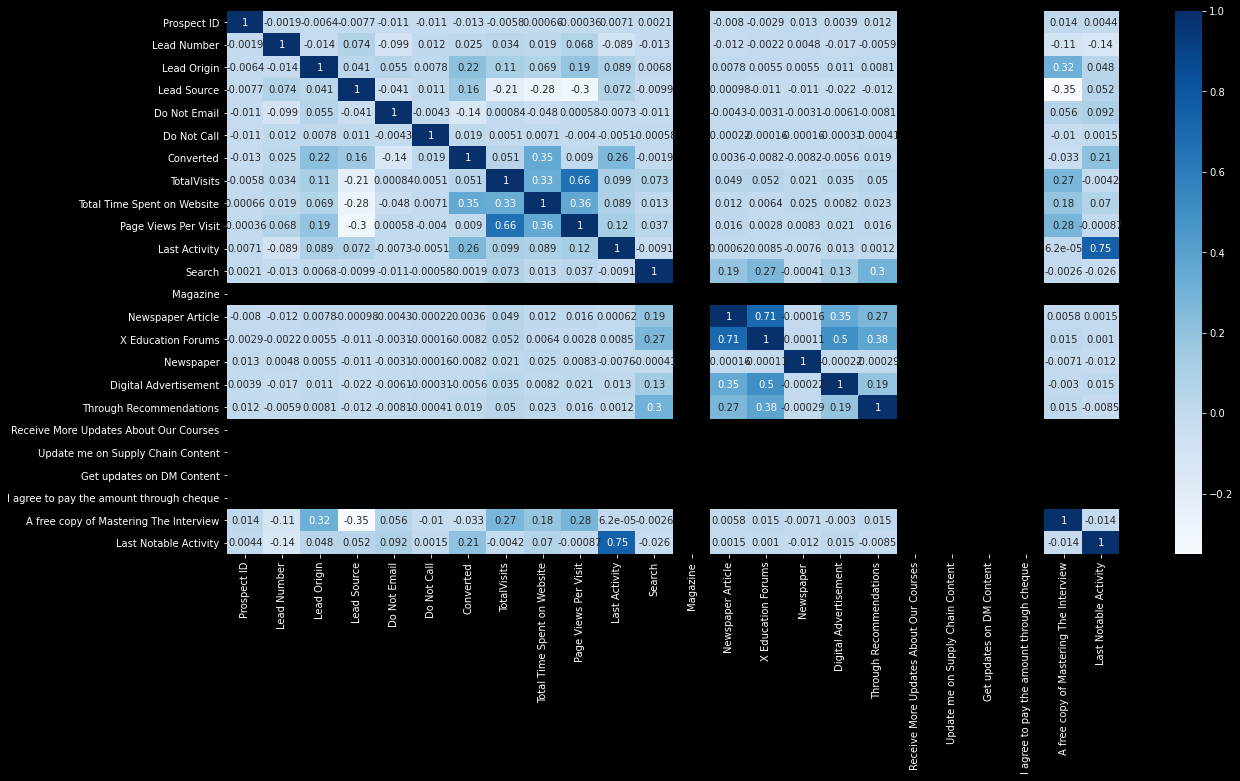

In [163]:
#plotting Correlations
plt.figure(figsize=(20,10))
sns.heatmap(data2.corr(), annot=True, cmap="Blues")
plt.show()

In [164]:
X_train.shape

(6361, 23)

In [165]:
X_test.shape

(2727, 23)

Model Building

-- Running your First Training Model

In [166]:
import statsmodels.api as sm

#logistic regression model
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6361
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3185.0
Date:                Mon, 28 Jun 2021   Deviance:                       6370.0
Time:                        11:49:08   Pearson chi2:                 6.56e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.3810      0.144    -23.500      0.000      -3.663      -3.099
Prospect ID                               -1.21e-05   1.16e-05     -1.047      0.295   -3.48e-05    1.05e-05
Lead Number                               1.871e-05   1.19e-05      1.570      0.116   -4.65e-06    4.21e-05
Lead Origin                                  0.8960      0.055     16.256      0.000       0.788       1.004
Lead Source                                  0.1599      0.012     13.354      0.000       0.136       0.183
Do Not Email                                -1.6290      0.152    -10.735      0.000      -1.926      -1.332
Do Not Call                                 20.7815   2.02e+04      0.001      0.999   -3.96e+04    3.97e+04
TotalVisits                                  0.0235      0.012      1.986      0.047       0.000       0.047
Total Time Spent on Website                  0.0021   7.12e-05     29.470      0.000       0.002       0.002
Page Views Per Visit                        -0.0128      0.001     -9.365      0.000      -0.015      -0.010
Last Activity                                0.2037      0.020     10.276      0.000       0.165       0.243
Search                                      -1.4875      1.206     -1.233      0.218      -3.852       0.877
Magazine                                 -1.002e-11   1.29e-08     -0.001      0.999   -2.54e-08    2.54e-08
Newspaper Article                          -11.4464   1.46e+04     -0.001      0.999   -2.87e+04    2.86e+04
X Education Forums                         -11.4464   1.46e+04     -0.001      0.999   -2.87e+04    2.86e+04
Newspaper                                -5.124e-15   7.12e-12     -0.001      0.999    -1.4e-11    1.39e-11
Digital Advertisement                        0.2440      1.572      0.155      0.877      -2.837       3.326
Through Recommendations                      2.1773      1.933      1.127      0.260      -1.611       5.965
Receive More Updates About Our Courses            0          0        nan        nan           0           0
Update me on Supply Chain Content                 0          0        nan        nan           0           0
Get updates on DM Content                         0          0        nan        nan           0           0
I agree to pay the amount through cheque          0          0        nan        nan           0           0
A free copy of Mastering The Interview      -0.3940      0.077     -5.102      0.000      -0.545      -0.243
Last Notable Activity                        0.0238      0.016      1.522      0.128      -0.007       0.054
============================================================================================================
"""

Feature Selection(Using RFE)

-- drop and priortize columns

In [167]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


from sklearn.feature_selection import RFE
#note the input variables as output with RFE(13)
rfe = RFE(logreg,10)
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([False, False,  True,  True,  True,  True, False, False, False,
        True,  True, False,  True,  True, False,  True, False, False,
       False, False, False,  True, False])

In [168]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Prospect ID', False, 7),
 ('Lead Number', False, 8),
 ('Lead Origin', True, 1),
 ('Lead Source', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 4),
 ('Last Activity', True, 1),
 ('Search', True, 1),
 ('Magazine', False, 14),
 ('Newspaper Article', True, 1),
 ('X Education Forums', True, 1),
 ('Newspaper', False, 9),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 6),
 ('Receive More Updates About Our Courses', False, 10),
 ('Update me on Supply Chain Content', False, 11),
 ('Get updates on DM Content', False, 12),
 ('I agree to pay the amount through cheque', False, 13),
 ('A free copy of Mastering The Interview', True, 1),
 ('Last Notable Activity', False, 2)]

In [169]:
cols2 = X_train.columns[rfe.support_]
cols2

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Search', 'Newspaper Article', 'X Education Forums',
       'Digital Advertisement', 'A free copy of Mastering The Interview'],
      dtype='object')

In [170]:
X_train.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [171]:
cols2 = ['Prospect ID', 'Lead Number','TotalVisits',
        'Search', 'Magazine', 'Newspaper Article',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque']
for col in cols2:
  X_train = X_train.drop([col], axis=1)
  print(col)

Prospect ID
Lead Number
TotalVisits
Search
Magazine
Newspaper Article
Newspaper
Digital Advertisement
Through Recommendations
Receive More Updates About Our Courses
Update me on Supply Chain Content
Get updates on DM Content
I agree to pay the amount through cheque


Assigning the model with StatsModel

In [172]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6361
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3189.9
Date:                Mon, 28 Jun 2021   Deviance:                       6379.9
Time:                        11:49:11   Pearson chi2:                 6.58e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -3.3271      0.118    -28.169      0.000      -3.559      -3.096
Lead Origin                                0.8894      0.055     16.181      0.000       0.782       0.997
Lead Source                                0.1623      0.012     13.598      0.000       0.139       0.186
Do Not Email                              -1.6372      0.152    -10.795      0.000      -1.934      -1.340
Do Not Call                               20.9002   2.01e+04      0.001      0.999   -3.94e+04    3.94e+04
Total Time Spent on Website                0.0021   7.09e-05     29.824      0.000       0.002       0.002
Page Views Per Visit                      -0.0111      0.001     -9.899      0.000      -0.013      -0.009
Last Activity                              0.2048      0.020     10.351      0.000       0.166       0.244
X Education Forums                       -21.5880   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
A free copy of Mastering The Interview    -0.3853      0.076     -5.055      0.000      -0.535      -0.236
Last Notable Activity                      0.0201      0.016      1.296      0.195      -0.010       0.051
==========================================================================================================
"""

Checking VIF Variance Inflation Factor

--  it gives a basic quantitaive idea about how much the feature variable are corelated with each other.

In [173]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Notable Activity,12.65
6,Last Activity,10.93
5,Page Views Per Visit,2.83
1,Lead Source,2.76
0,Lead Origin,2.62
4,Total Time Spent on Website,2.10
8,A free copy of Mastering The Interview,1.86
2,Do Not Email,1.11
3,Do Not Call,1.00
7,X Education Forums,1.00


In [174]:
X_train = X_train.drop(["Do Not Call"], axis=1)
X_train = X_train.drop(["X Education Forums"], axis=1)

In [175]:
col = X_train.columns
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6361
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3191.5
Date:                Mon, 28 Jun 2021   Deviance:                       6383.0
Time:                        11:49:11   Pearson chi2:                 6.58e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -3.3282      0.118    -28.175      0.000      -3.560      -3.097
Lead Origin                                0.8895      0.055     16.191      0.000       0.782       0.997
Lead Source                                0.1626      0.012     13.618      0.000       0.139       0.186
Do Not Email                              -1.6374      0.152    -10.795      0.000      -1.935      -1.340
Total Time Spent on Website                0.0021   7.09e-05     29.844      0.000       0.002       0.002
Page Views Per Visit                      -0.0111      0.001     -9.891      0.000      -0.013      -0.009
Last Activity                              0.2041      0.020     10.321      0.000       0.165       0.243
A free copy of Mastering The Interview    -0.3877      0.076     -5.088      0.000      -0.537      -0.238
Last Notable Activity                      0.0206      0.016      1.326      0.185      -0.010       0.051
==========================================================================================================
"""

In [176]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18992378, 0.6278363 , 0.20829632, 0.23736001, 0.43871843,
       0.17237816, 0.14382347, 0.45225013, 0.06569052, 0.23894874])

In [177]:
#create a new column based on condition
y_pred_final = pd.DataFrame({"Converted":y_train.values, "Converted_prob": y_train_pred})
y_pred_final["Predicted"] = y_pred_final.Converted_prob.map(lambda x:1 if x>0.5 else 0)

y_pred_final

,Converted,Converted_prob,Predicted
0,0,0.189924,0
1,1,0.627836,1
2,0,0.208296,0
3,0,0.237360,0
4,0,0.438718,0
...,...,...,...
6356,0,0.673211,1
6357,1,0.129749,0
6358,0,0.876192,1
6359,0,0.028155,0


In [178]:
y_pred_final.Predicted.value_counts()

0    4332
1    2029
Name: Predicted, dtype: int64

Evaluation and Metrics

In [179]:
from sklearn import metrics

#confusion Matrix
cnf = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Predicted)
cnf

array([[3384,  518],
       [ 948, 1511]])

<Figure size 144x144 with 0 Axes>

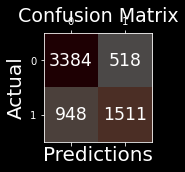

In [180]:
#visualize it using matplotlib

plt.figure(figsize=[2,2])
fig, ax = plt.subplots(figsize=(2,2))
ax.matshow(cnf, cmap=plt.cm.Reds, alpha =0.3)

for i in range(cnf.shape[0]):
  for j in range(cnf.shape[1]):
    ax.text(x=j, y=i, s=cnf[i,j], va="center", ha="center", size="xx-large")

plt.xlabel("Predictions", fontsize=20)
plt.ylabel("Actual", fontsize=20)
plt.title("Confusion Matrix", fontsize=19)
plt.show()

In [181]:
#overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Predicted)

0.7695330922810879

In [182]:
TP = cnf[1,1] #true Positive
TN = cnf[0,0] #true Negatives
FP = cnf[0,1] #false Positives
FN = cnf[1,0] #false Negatives

In [183]:
#senstivity
TP/float(TP+FN)

0.6144774298495324

In [184]:
#specificity
TN/float(TN+FP)

0.867247565351102

In [185]:
#false Positivity Rate
FP/float(TN+FP)

0.132752434648898

In [186]:
#positive predictive values
TP/float(TP+FP)

0.7447018235584032

In [187]:
#Negative Predictive Values
TN/float(TN+FN)

0.7811634349030471

In [188]:
#compute F1 score, Precision, Recall

from sklearn.metrics import f1_score, precision_score, recall_score

In [189]:
f01 = f1_score(y_pred_final.Converted, y_pred_final.Predicted, average="macro")
f02 = f1_score(y_pred_final.Converted, y_pred_final.Predicted, average="micro")


precision = precision_score(y_pred_final.Converted, y_pred_final.Predicted, average="macro")
recall = recall_score(y_pred_final.Converted, y_pred_final.Predicted, average="macro")

print("Precision", precision)
print("Recall", recall)
print("F1- score", 2*(precision*recall)/(precision+recall)*100)

Precision 0.7629326292307251
Recall 0.7408624976003172
F1- score 75.17356096023013


ROC Curve

-- It demonstrates several things

  -- shows tradeoff between sensitivity and specificity

In [190]:
def roc_curve2(actual, probs):
  fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
  auc_score = metrics.roc_auc_score(actual, probs)
  plt.figure(figsize=(5,5))
  plt.plot(fpr, tpr, label="Roc Curve (area=%.2f)"% auc_score)
  plt.plot([0,1],[0,1], "k--")
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positie rate")
  plt.title("Roc-Receiver Operating Characteristics")
  plt.legend(loc="lower right")
  plt.show()

  return None
  

In [204]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Converted, y_pred_final.Converted_prob, drop_intermediate=False)
#fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Converted, y_pred_final.Converted_prob)

In [ ]:
#plt.plot(thresholds, fpr[:-1], "g-")
#plt.plot(thresholds, tpr[:-1], "r-")
#plt.show()

<Figure size 576x576 with 0 Axes>

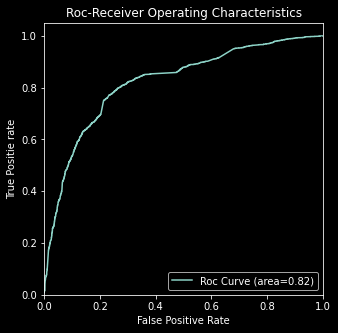

In [192]:
plt.figure(figsize=[8,8])
roc_curve2(y_pred_final.Converted, y_pred_final.Converted_prob)

finding the optimal cutoff point

In [193]:
#lets create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
  y_pred_final[i] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 1 else 0)


y_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.189924,0,0,0,0,0,0,0,0,0,0,0
1,1,0.627836,1,0,0,0,0,0,0,0,0,0,0
2,0,0.208296,0,0,0,0,0,0,0,0,0,0,0
3,0,0.237360,0,0,0,0,0,0,0,0,0,0,0
4,0,0.438718,0,0,0,0,0,0,0,0,0,0,0


In [199]:
cutoff_df = pd.DataFrame(columns = ["prob", "accuracy", "sensi", "speci"])

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2, 0.3,0.4,0.5,0.6,0.7,0.9]
for i in num:
  cm1 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final[i])

  total1 = sum(sum(cm1))
  accuracy = cm1[0,0]+cm1[1,1]/total1

  speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  cutoff_df.loc[i] = [i, accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy  sensi  speci
0.0   0.0    3902.0    0.0    1.0
0.1   0.1    3902.0    0.0    1.0
0.2   0.2    3902.0    0.0    1.0
0.3   0.3    3902.0    0.0    1.0
0.4   0.4    3902.0    0.0    1.0
0.5   0.5    3902.0    0.0    1.0
0.6   0.6    3902.0    0.0    1.0
0.7   0.7    3902.0    0.0    1.0
0.9   0.9    3902.0    0.0    1.0


In [ ]:
#lets plot
cutoff_df.plot.line(x="prob", y=["accuracy", "sensi", "speci"])
plt.show()